## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")

# Display the data table for preview
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice. Should be 
len(complete_data['Mouse ID'].unique())

249

In [3]:
#filter for duplicated Mouse ID and Times
complete_data.duplicated(subset = ['Mouse ID','Timepoint']).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [4]:
#show the Mouse with the duplicated data
complete_data[complete_data.duplicated(subset = ['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# drop the Mouse with duped data

# all data for g989 was dropped due to differences in the Tumor Volume
#since we are unable to determine which was the valid data set, both sets were dropped. 

clean_data = complete_data.loc[(complete_data['Mouse ID'] != 'g989'),:]

In [6]:
#check to make sure the dupe mouse was dropped
#clean_data[clean_data.duplicated(subset = ['Mouse ID','Timepoint'])]

In [7]:
# Checking the number of mice in the clean DataFrame.
#len(clean_data['Mouse ID'].unique())

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation 
# and SEM of the tumor volume for each regimen

#group data
by_regimen = clean_data.groupby('Drug Regimen')

#pull and store mean, median, variance, standard deviation, and SEM of the tumor volume.
tvmean_by_reg = by_regimen['Tumor Volume (mm3)'].mean()
tvmedian_by_reg = by_regimen['Tumor Volume (mm3)'].median()
tvvar_by_reg = by_regimen['Tumor Volume (mm3)'].var()
tvstd_by_reg = by_regimen['Tumor Volume (mm3)'].std()
tvsem_by_reg = by_regimen['Tumor Volume (mm3)'].sem()

#create summary dataframe
tumor_by_regimen = pd.DataFrame({
    "Tumor Mean": tvmean_by_reg,
    "Tumor Median": tvmedian_by_reg,
    "Tumor Variance": tvvar_by_reg,
    "Tumor Standard Deviation": tvstd_by_reg,
    "Standard Error of Mean": tvsem_by_reg
})

#display
tumor_by_regimen
 


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen using the aggregation method
by_regimen['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

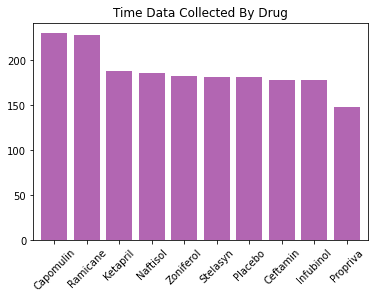

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
count_by_drug = clean_data['Drug Regimen'].value_counts()

#plot directly form series
count_by_drug.plot(kind='bar', color="purple",alpha=0.6,width=0.8,)

plt.xticks(rotation = 45) 
plt.title('Time Data Collected By Drug')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

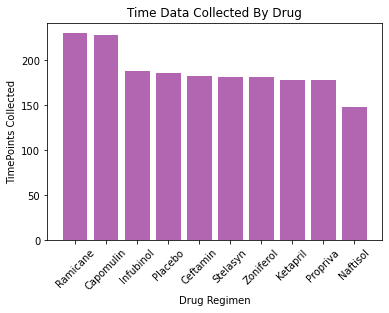

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyPlot

#create variables with data
time_by_drug = clean_data['Drug Regimen'].value_counts()
drug_names = clean_data['Drug Regimen'].unique()

#plot the data using variables
plt.bar(drug_names,time_by_drug,color="purple",alpha=0.6,width=0.8)

#format and label
plt.xticks(rotation = 45) 
plt.title('Time Data Collected By Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('TimePoints Collected')
plt.show

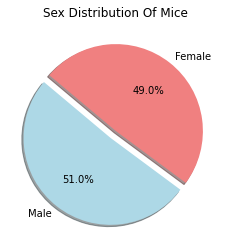

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#creating my variables
sex_counts = clean_data['Sex'].value_counts()
sex_labels = clean_data['Sex'].unique()
colors = ['lightblue','lightcoral']
explode = (0.1,0)

#plotting using the plt.pie function
plt.pie(sex_counts, explode=explode, labels=sex_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Sex Distribution Of Mice')
plt.show()

<AxesSubplot:title={'center':'Sex Distribution Of Mice'}, ylabel='Sex'>

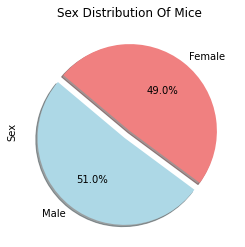

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_data['Sex'].value_counts()

#plot pie chart directly from the dataframe
sex.plot(kind='pie', colors=['lightblue','lightcoral'], explode = (0.1,0), 
         shadow=True, startangle=140, autopct="%1.1f%%",
         title = 'Sex Distribution Of Mice')

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# pull data for only those drug trials
focus_drugs = clean_data.loc[(clean_data['Drug Regimen'] == 'Ramicane')|
                             (clean_data['Drug Regimen'] == 'Capomulin')|
                             (clean_data['Drug Regimen'] == 'Infubinol')|
                             (clean_data['Drug Regimen'] == 'Ceftamin'),
                             :]
#verifyed dataframe with ---> focus_drugs['Drug Regimen'].unique()
# 100 mice in this sub group

#grouped by mouse id and pulled the max (last time point for each mouse)
#maxtime_focus_group = focus_drugs.groupby('Mouse ID')['Timepoint'].max().reset_index()
maxtime_focus_group = focus_drugs.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

#merges the max timepoint with full data set to recomplete the data set
focus_group_tv_results = pd.merge(maxtime_focus_group,complete_data, on=['Mouse ID','Timepoint'],how='left')

#verified that the focus group and final data frame contained the same mice IDs after the merge
#focus_id_1 = focus_group_final_tv['Mouse ID'].unique().sort()
#focus_id_2 = focus_drugs['Mouse ID'].unique().sort()
#np.array_equal(focus_id_1, focus_id_2) = True

In [15]:
#function for calculate statical data from each focus group
    
def stat_summary(series, name):
    quartiles = series.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = series.loc[(series < lower_bound) | (series > upper_bound)]
    
    print(f'{name} Stat Summary')
    print('----------------------------')
    print(f"lower quartile = {lowerq}")
    print(f"upper quartile = {upperq}")
    print(f"median = {quartiles[0.5]} ")
    print(f"IQR = {iqr}")
    print('----------------------------')
    print(f'The lower boundary is {lower_bound}. and the upper boundary is {upper_bound}.')
    print('----------------------------')
    if len(outliers)>0:
        print(f'{name} has {len(outliers)} potential outlier(s).')
        print(f'Outliers(index, final tumor volume): {outliers}')
    else:
        print(f'{name} has no potential outliers.')
    

In [16]:
infubinol_tv = focus_group_tv_results.loc[(focus_group_tv_results['Drug Regimen'] == 'Infubinol'),:]
stat_summary(infubinol_tv['Tumor Volume (mm3)'], 'Infubinol')

Infubinol Stat Summary
----------------------------
lower quartile = 54.04860769
upper quartile = 65.52574285
median = 60.16518046 
IQR = 11.477135160000003
----------------------------
The lower boundary is 36.83290494999999. and the upper boundary is 82.74144559000001.
----------------------------
Infubinol has 1 potential outlier(s).
Outliers(index, final tumor volume): 15    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [17]:
ceftamin_tv = focus_group_tv_results.loc[(focus_group_tv_results['Drug Regimen'] == 'Ceftamin'),:]
stat_summary(ceftamin_tv['Tumor Volume (mm3)'], 'Ceftamin')

Ceftamin Stat Summary
----------------------------
lower quartile = 48.72207785
upper quartile = 64.29983003
median = 59.85195552 
IQR = 15.577752179999997
----------------------------
The lower boundary is 25.355449580000002. and the upper boundary is 87.66645829999999.
----------------------------
Ceftamin has no potential outliers.


In [18]:
ramicane_tv = focus_group_tv_results.loc[(focus_group_tv_results['Drug Regimen'] == 'Ramicane'),:]
stat_summary(ramicane_tv['Tumor Volume (mm3)'], 'Ramicane')

Ramicane Stat Summary
----------------------------
lower quartile = 31.56046955
upper quartile = 40.65900627
median = 36.56165229 
IQR = 9.098536719999998
----------------------------
The lower boundary is 17.912664470000003. and the upper boundary is 54.30681135.
----------------------------
Ramicane has no potential outliers.


In [19]:
capomulin_tv = focus_group_tv_results.loc[(focus_group_tv_results['Drug Regimen'] == 'Capomulin'),:]
stat_summary(capomulin_tv['Tumor Volume (mm3)'], 'Capomulin')

Capomulin Stat Summary
----------------------------
lower quartile = 32.37735684
upper quartile = 40.1592203
median = 38.1251644 
IQR = 7.781863460000004
----------------------------
The lower boundary is 20.70456164999999. and the upper boundary is 51.83201549.
----------------------------
Capomulin has no potential outliers.


In [20]:
focus_group_tv_results['Drug Regimen'].unique()

array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest(fox box plots on the same diagram)
regimen = focus_group_tv_results['Drug Regimen'].unique()


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

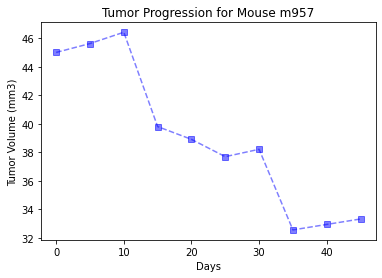

In [45]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# select for only capomulin mice
capo_mice = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin'),:]

#select single capomulin mouse
capo_mouse = capo_mice.loc[(clean_data['Mouse ID'] == 'm957'),:]
capo_mouse_x = capo_mouse['Timepoint']
capo_mouse_y = capo_mouse['Tumor Volume (mm3)']

#format graph
plt.plot(capo_mouse_x,capo_mouse_y, color='blue', alpha=0.5, marker='s', linestyle='dashed')
plt.title('Tumor Progression for Mouse m957')
plt.xlabel('Days')
plt.ylabel('Tumor Volume (mm3)')
plt.show

In [53]:
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


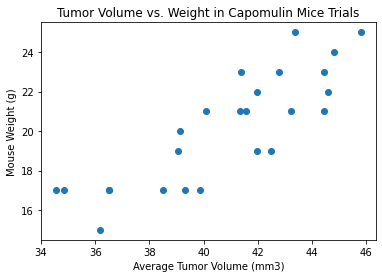

In [58]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#create variables
capo_mice_avg_tv = capo_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
capo_mice_avg_wg = capo_mice.groupby('Mouse ID')['Weight (g)'].mean()
capo_mice_avg_wg

plt.scatter(capo_mice_avg_tv, capo_mice_avg_wg)
plt.title('Tumor Volume vs. Weight in Capomulin Mice Trials')
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
